In [9]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd
import dash_auth
import os
import seaborn as sns

In [59]:
#importando os arquivos
caminho_padrao = r'C:\Users\feals\OneDrive\Área de Trabalho\Configurações Importantes - Python e Power BI'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Vendas - 2017.csv'), sep=';')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Cadastro Produtos.csv'), sep=';', encoding='latin1')
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Lojas.csv'), sep=';',encoding='latin1')
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Clientes.csv'), sep=';',encoding='latin1')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,anne5@adventure-works.com


## Selecionando apenas as lojas 86, 306 e 172

In [64]:
tres_lojas_df = vendas_df
tres_lojas_df = tres_lojas_df[tres_lojas_df['ID Loja'].isin([86, 306, 172])]
tres_lojas_df['Data da Venda'] = pd.to_datetime(tres_lojas_df['Data da Venda'], format='%d/%m/%Y')
display(tres_lojas_df)

C:\Users\feals\AppData\Local\Temp\ipykernel_7584\4223067024.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,2017-03-20,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,2017-05-21,22/05/2017,1,86,981,1,21344,10,0,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,2017-08-18,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,2017-06-08,11/06/2017,3,172,1287,1,559,5,0,Contoso Genuine Leather Grip Belt E322 White,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,2017-09-17,23/09/2017,6,172,1236,3,13331,6,0,"Fabrikam Social Videographer 1"" 25mm E400 Blue",Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,2017-10-18,19/10/2017,1,172,1243,1,3459,5,0,Fabrikam Social Videographer 1'' 25mm E400 White,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,2017-10-30,02/11/2017,3,172,937,1,341,10,0,SV 4GB Laptop Memory M65 White,Loja Contoso Hartford,mpadfield9g@usnews.com


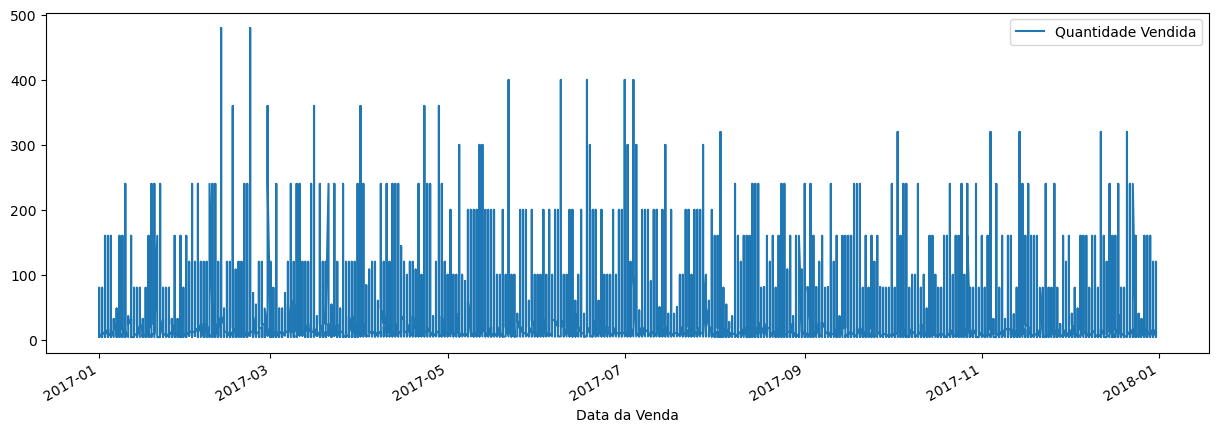

In [7]:
import matplotlib.pyplot as plt

tres_lojas_df.plot(x='Data da Venda', y='Quantidade Vendida', figsize=(15,5))
plt.show()

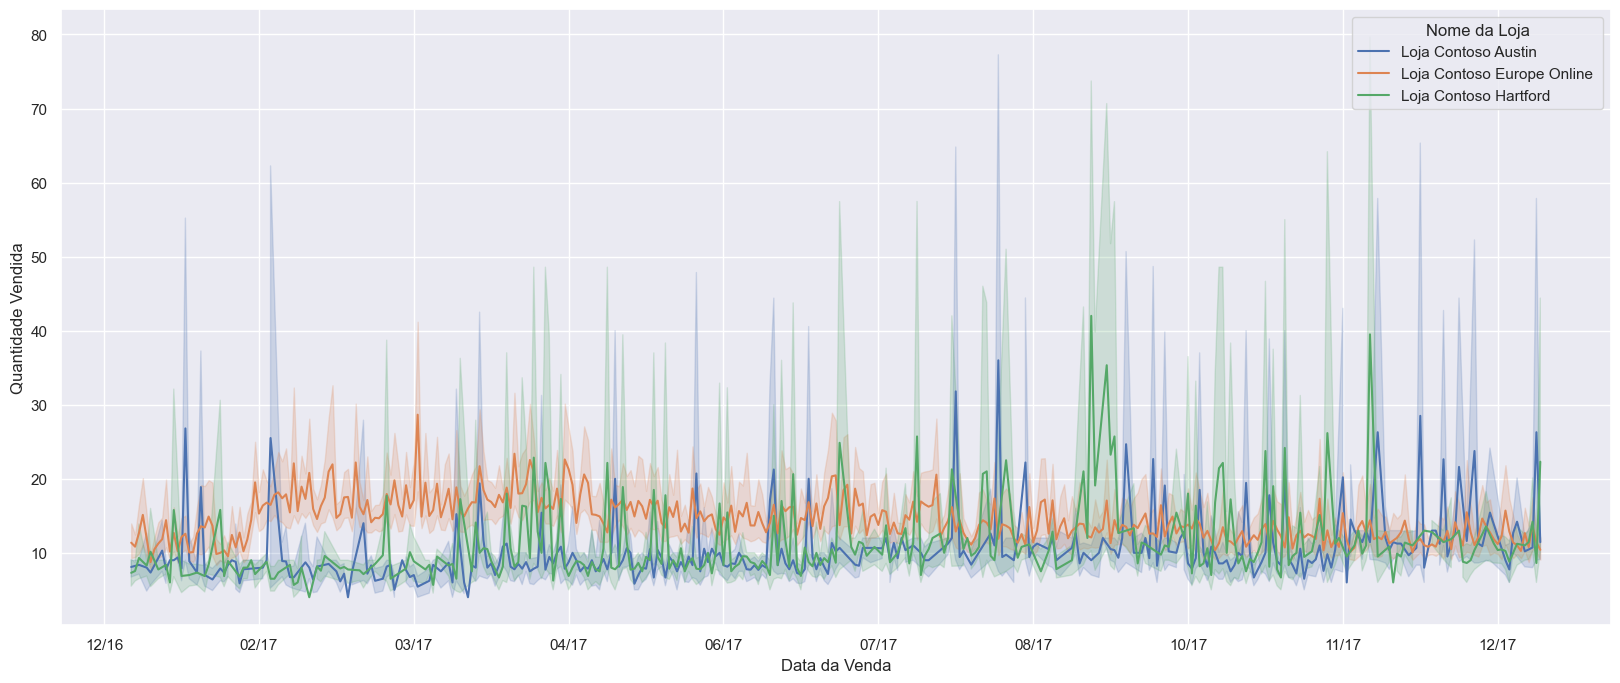

In [62]:
from matplotlib.dates import DateFormatter

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize = (20, 8))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(DateFormatter('%m/%y'))

sns.lineplot(x='Data da Venda', y='Quantidade Vendida', hue='Nome da Loja', data=tres_lojas_df,ax=ax)

plt.show()

In [68]:
USUARIOS = {
    "Felipe": "141414",
    "Leal": "959595",
}

app = Dash(__name__) # criando o seu aplicativo Dash
auth = dash_auth.BasicAuth(app, USUARIOS)
# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options


grafico = px.bar(tres_lojas_df, x='Data da Venda', y='Quantidade Vendida', color= 'Nome da Loja', barmode="group") 

# lista_marcas = ["Treinamentos", "Programação", "Todas"]
lista_lojas = list(tres_lojas_df["Nome da Loja"].unique())
lista_lojas.append("Todas")


# css
app.layout = html.Div(children=[
    html.H1(children='Dashboard de Vendas'),

    html.Div(children='''
        Grafico de Vendas em Python
    '''),
    
    html.H3(children="Vendas por Loja", id="subtitulo"),
    dcc.Graph(id='vendas_por_loja',figure=grafico),
    
    
], style={"text-align": "center"})


# callbacks -> dar funcionalidade pro nosso dashboard (conecta os botões com os gráficos)
@app.callback(
    Output('subtitulo', 'children'), # eu quero modificar (eu quero que o botão do input modifique)
    Input('selecao_lojas', 'value'), # quem está modificando/de onde eu quero pegar a informacao/que tá fazendo um filtro
)
def selecionar_loja(loja):
    if loja == "Todas":
        texto = "Vendas por Loja"
    else:
        texto = f"Vendas de cada Produto por{loja}"           
    return texto, fig


# colocando o seu site (seu dashboard) no ar
if __name__ == '__main__':
    app.run_server(debug=False, port=8052) # or whatever you choose

Exception: Login Required